In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from scipy.special import softmax



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


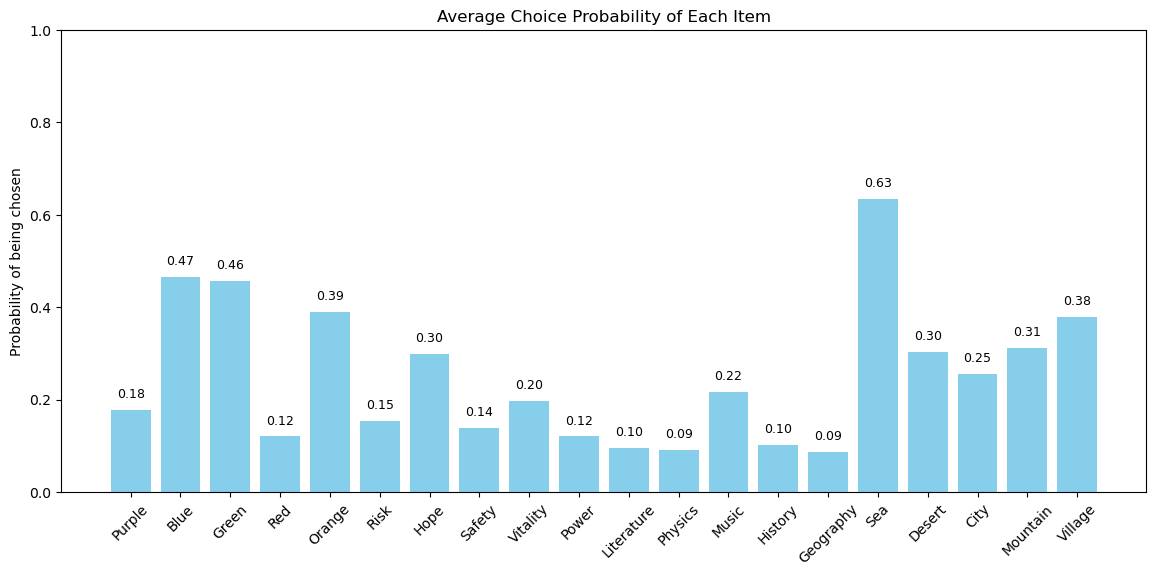

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读你的数据
df = pd.read_excel("model_variables.xlsx")  # 或 csv

item_list = [
    'Purple','Blue','Green','Red','Orange',
    'Risk','Hope','Safety','Vitality','Power',
    'Literature','Physics','Music','History',
    'Geography','Sea','Desert','City','Mountain','Village'
]

# 初始化计数
appear_counts = {item: 0 for item in item_list}
choose_counts = {item: 0 for item in item_list}

# 遍历每个 trial
for _, row in df.iterrows():
    # 1. 找该 trial 出现的 items（payoff > 0）
    present_items = [item for item in item_list 
                     if pd.notna(row[f"Payoff_{item}"]) and row[f"Payoff_{item}"] > 0]

    # 2. 累计出现次数
    for item in present_items:
        appear_counts[item] += 1

    # 3. 统计被选中的 item
    chosen = str(row["Choice_itemName"]).strip().title()  # 防止大小写问题
    if chosen in item_list:
        choose_counts[chosen] += 1

# 计算平均选择概率
choose_prob = {
    item: (choose_counts[item] / appear_counts[item]) if appear_counts[item] > 0 else 0
    for item in item_list
}

# 画柱状图
plt.figure(figsize=(14,6))
plt.bar(item_list, [choose_prob[item] for item in item_list], color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("Probability of being chosen")
plt.title("Average Choice Probability of Each Item")
plt.ylim(0, 1)

# 在柱子上显示数值
for i, item in enumerate(item_list):
    plt.text(i, choose_prob[item] + 0.02, f"{choose_prob[item]:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.show()


In [3]:
import pandas as pd
import numpy as np

# 读取你的数据（请修改为你的文件路径）
df = pd.read_csv("model_variables_clean.csv")  # or read_excel

item_list = [
    'Purple','Blue','Green','Red','Orange',
    'Risk','Hope','Safety','Vitality','Power',
    'Literature','Physics','Music','History',
    'Geography','Sea','Desert','City','Mountain','Village'
]

def check_all_users(df):

    report = []  # 保存结果

    for uid in df["User"].unique():

        user_df = df[df["User"] == uid].reset_index(drop=True)

        print("\n" + "="*60)
        print(f"🔍 Checking User {uid}")
        print("="*60)

        for t, row in user_df.iterrows():

            trial_id = row.get("Trial", t)

            # ---- 找到 present_items ----
            present_items = []
            for item in item_list:
                payoff = row.get(f"Payoff_{item}", np.nan)
                if pd.notna(payoff) and payoff > 0:
                    present_items.append(item)

            chosen = str(row["Choice_itemName"]).strip().title()

            # ---- 检查 present_items 是否为空 ----
            if len(present_items) == 0:
                print(f"⚠️ User {uid} Trial {trial_id}: present_items is EMPTY")
                report.append((uid, trial_id, "EMPTY_PRESENT", chosen, present_items))

            # ---- 检查 chosen 是否在 present_items ----
            if chosen not in present_items:
                print(f"❌ User {uid} Trial {trial_id}: chosen '{chosen}' NOT IN present_items {present_items}")
                report.append((uid, trial_id, "CHOSEN_NOT_PRESENT", chosen, present_items))

            # ---- 检查 payoff NaN ----
            for item in present_items:
                payoff = row[f"Payoff_{item}"]
                if pd.isna(payoff):
                    print(f"⚠️ User {uid} Trial {trial_id}: Payoff_{item} is NaN")
                    report.append((uid, trial_id, "PAYOFF_NAN", item, payoff))

            # ---- 检查 EV / Var / Unc 是否 NaN 或 Inf ----

            for item in present_items:
                EV = row.get(f"EV_{item}", None)
                Var = row.get(f"Var_{item}", None)

                if pd.isna(EV):
                    print(f"⚠️ EV NaN at User {uid} Trial {trial_id} Item {item}")
                    report.append((uid, trial_id, "EV_NAN", item, EV))

                if pd.isna(Var):
                    print(f"⚠️ Var NaN at User {uid} Trial {trial_id} Item {item}")
                    report.append((uid, trial_id, "VAR_NAN", item, Var))

                if Var < 0:
                    print(f"🚨 Var NEGATIVE at User {uid} Trial {trial_id} Item {item}: {Var}")
                    report.append((uid, trial_id, "VAR_NEGATIVE", item, Var))

                # Uncertainty calculation
                Unc = 1 / (Var + 1) if Var is not None else None
                if np.isinf(Unc) or np.isnan(Unc):
                    print(f"🚨 Unc BAD at User {uid} Trial {trial_id} Item {item}: Unc={Unc}, Var={Var}")
                    report.append((uid, trial_id, "UNC_BAD", item, Unc))

    print("\n\n===== SUMMARY REPORT =====")
    print(f"Total issues found: {len(report)}")
    return report

# 运行检测
issues = check_all_users(df)



🔍 Checking User 1

🔍 Checking User 2

🔍 Checking User 3

🔍 Checking User 4

🔍 Checking User 5

🔍 Checking User 6

🔍 Checking User 7

🔍 Checking User 8

🔍 Checking User 9

🔍 Checking User 10

🔍 Checking User 11

🔍 Checking User 12

🔍 Checking User 13

🔍 Checking User 14

🔍 Checking User 15

🔍 Checking User 16

🔍 Checking User 17

🔍 Checking User 18

🔍 Checking User 19

🔍 Checking User 20

🔍 Checking User 21

🔍 Checking User 22

🔍 Checking User 23

🔍 Checking User 24

🔍 Checking User 25

🔍 Checking User 26


===== SUMMARY REPORT =====
Total issues found: 0


In [2]:
df_clean = df[~((df["User"] == 4) & (df["Trial"] == 40))].copy()
df_clean.to_csv("model_variables_clean.csv", index=False)


In [3]:
# 读你的总表
df = pd.read_csv("model_variables_clean.csv")   # 或 read_csv，看你存的格式
item_list = [
    'Purple','Blue','Green','Red','Orange',
    'Risk','Hope','Safety','Vitality','Power',
    'Literature','Physics','Music','History',
    'Geography','Sea','Desert','City','Mountain','Village'
]

df["Disappointment"] = df["Disappointment"].fillna(0)
df["Regret"] = df["Regret"].fillna(0)

# 只保留有有效选择的 trial
df = df[df["Choice_itemName"].notna()]
df = df[df["Choice_itemName"] != 0]

# 把选项名字标准化成和 item_list 一致的格式
df["Choice_itemName"] = df["Choice_itemName"].astype(str).str.strip().str.title()

In [4]:
df

,User,Trial,Choice_itemID,Choice_itemName,Choice_category,Pref_Purple,Pref_Blue,Pref_Green,Pref_Red,Pref_Orange,...,RPE_City,EV_Mountain,Var_Mountain,RPE_Mountain,EV_Village,Var_Village,RPE_Village,Regret,Disappointment,Uncertainty
0,1,1,7.0,Hope,Abstract,3,4,2,2,3,...,NaN,0.00,1.000,NaN,0.00,1.000,NaN,1.0,0.000000,0.263158
1,1,2,9.0,Vitality,Abstract,3,4,2,2,3,...,NaN,0.00,1.000,NaN,0.00,1.000,NaN,0.0,-1.000000,0.357143
2,1,3,12.0,Physics,Disciplines,3,4,2,2,3,...,NaN,0.00,1.000,NaN,0.00,1.000,NaN,0.0,-0.500000,0.357143
3,1,4,16.0,Sea,Places,3,4,2,2,3,...,NaN,0.00,1.000,NaN,0.00,1.000,NaN,0.0,1.666667,0.192308
4,1,5,13.0,Music,Disciplines,3,4,2,2,3,...,NaN,0.00,1.000,NaN,0.00,1.000,NaN,0.0,-0.750000,0.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,26,36,10.0,Power,Abstract,1,1,1,1,1,...,NaN,1.23,3.042,NaN,0.90,2.800,NaN,0.0,0.291714,0.253036
1035,26,37,1.0,Purple,Color,1,1,1,1,1,...,NaN,1.23,3.042,NaN,0.90,2.800,NaN,0.0,0.163611,0.258286
1036,26,38,6.0,Risk,Abstract,1,1,1,1,1,...,NaN,1.23,3.042,NaN,0.90,2.800,NaN,0.0,-0.650811,0.195535
1037,26,39,16.0,Sea,Places,1,1,1,1,1,...,NaN,1.23,3.042,NaN,0.90,2.800,NaN,0.0,-2.311684,0.150435


In [6]:
# 对所有特征进行标准化
from sklearn.preprocessing import StandardScaler

def standardize_features(df, user_col='User'):
    """
    方案1: 只中心化，不缩放 - 保留特征间的真实相对重要性
    Preference不标准化(保留原始值)
    """
    
    scaled_df = df.copy()
    
    # 只标准化这些动态特征,不标准化Pref!
    dynamic_features = ['EV', 'Var', 'Regret', 'Dis', 'Unc']
    
    # 找出所有需要标准化的列
    feature_columns = []
    pref_columns = []
    
    for col in df.columns:
        # Pref列单独处理
        if col.startswith('Pref_'):
            pref_columns.append(col)
        else:
            # 其他特征正常标准化
            for feat in dynamic_features:
                if col.startswith(f"{feat}_"):
                    feature_columns.append(col)
                    break
    
    print(f"✓ 中心化列: {len(feature_columns)} 个")
    print(f"✓ 保留原值的Pref列: {len(pref_columns)} 个")
    
    # 对每个被试分别只做中心化（减去均值，不除以标准差）
    for uid in df[user_col].unique():
        user_mask = df[user_col] == uid
        user_indices = df[user_mask].index
        
        if len(feature_columns) > 0:
            user_features = df.loc[user_indices, feature_columns]
            # 只中心化：减去每个特征的均值
            centered_features = user_features - user_features.mean()
            scaled_df.loc[user_indices, feature_columns] = centered_features
        
        # Pref保持原始值(或者用全局标准化)
        if len(pref_columns) > 0:
            # 选项1: 完全不动
            pass
            
            # 选项2: 用全局范围归一化到[-1, 1]
            # for col in pref_columns:
            #     all_vals = df[col].values
            #     min_val, max_val = all_vals.min(), all_vals.max()
            #     scaled_df[col] = 2 * (df[col] - min_val) / (max_val - min_val) - 1
    
    return scaled_df

# 重新标准化
print("\n重新标准化...")


重新标准化...


In [215]:
def standardize_features(df, user_col='User'):
    """
    方案1: 只中心化动态特征，不缩放
    Pref_* 特征：全部除以 10（可以改成其他规则）
    """
    
    scaled_df = df.copy()
    
    dynamic_features = ['EV', 'Var', 'Regret', 'Dis', 'Unc']
    feature_columns = []
    pref_columns = []
    
    for col in df.columns:
        if col.startswith('Pref_'):
            pref_columns.append(col)
        else:
            if any(col.startswith(f"{feat}_") for feat in dynamic_features):
                feature_columns.append(col)

    print(f"✓ 中心化列: {len(feature_columns)} 个")
    print(f"✓ Pref列 (做 /10): {len(pref_columns)} 个")
    
    # 逐个用户处理
    for uid in df[user_col].unique():
        user_mask = df[user_col] == uid
        user_idx = df[user_mask].index
        
        # -------- 中心化动态特征 --------
        if feature_columns:
            user_feats = df.loc[user_idx, feature_columns]
            scaled_df.loc[user_idx, feature_columns] = user_feats - user_feats.mean()

        # -------- Pref 列全部除以 10（或你想要的规则）-------
        for col in pref_columns:
            # 先把整列转为 float，避免 dtype 冲突
            scaled_df[col] = scaled_df[col].astype(float)

            # 再进行除以 10
            scaled_df.loc[user_idx, col] = df.loc[user_idx, col] / 10


            # 如果想改成别的规则，例如减均值：
            # scaled_df.loc[user_idx, col] = df.loc[user_idx, col] - df.loc[user_idx, col].mean()

    return scaled_df


In [216]:
df_scaled = standardize_features(df, user_col='User')

✓ 中心化列: 40 个
✓ Pref列 (做 /10): 20 个


In [217]:
df_scaled

,User,Trial,Choice_itemID,Choice_itemName,Choice_category,Pref_Purple,Pref_Blue,Pref_Green,Pref_Red,Pref_Orange,...,RPE_City,EV_Mountain,Var_Mountain,RPE_Mountain,EV_Village,Var_Village,RPE_Village,Regret,Disappointment,Uncertainty
0,1,1,7.0,Hope,Abstract,0.3,0.4,0.2,0.2,0.3,...,NaN,-1.0449,-1.912377,NaN,-0.90420,-1.585936,NaN,1.0,0.000000,0.263158
1,1,2,9.0,Vitality,Abstract,0.3,0.4,0.2,0.2,0.3,...,NaN,-1.0449,-1.912377,NaN,-0.90420,-1.585936,NaN,0.0,-1.000000,0.357143
2,1,3,12.0,Physics,Disciplines,0.3,0.4,0.2,0.2,0.3,...,NaN,-1.0449,-1.912377,NaN,-0.90420,-1.585936,NaN,0.0,-0.500000,0.357143
3,1,4,16.0,Sea,Places,0.3,0.4,0.2,0.2,0.3,...,NaN,-1.0449,-1.912377,NaN,-0.90420,-1.585936,NaN,0.0,1.666667,0.192308
4,1,5,13.0,Music,Disciplines,0.3,0.4,0.2,0.2,0.3,...,NaN,-1.0449,-1.912377,NaN,-0.90420,-1.585936,NaN,0.0,-0.750000,0.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,26,36,10.0,Power,Abstract,0.1,0.1,0.1,0.1,0.1,...,NaN,0.8430,1.330700,NaN,0.41175,0.832950,NaN,0.0,0.291714,0.253036
1035,26,37,1.0,Purple,Color,0.1,0.1,0.1,0.1,0.1,...,NaN,0.8430,1.330700,NaN,0.41175,0.832950,NaN,0.0,0.163611,0.258286
1036,26,38,6.0,Risk,Abstract,0.1,0.1,0.1,0.1,0.1,...,NaN,0.8430,1.330700,NaN,0.41175,0.832950,NaN,0.0,-0.650811,0.195535
1037,26,39,16.0,Sea,Places,0.1,0.1,0.1,0.1,0.1,...,NaN,0.8430,1.330700,NaN,0.41175,0.832950,NaN,0.0,-2.311684,0.150435


In [15]:
def make_Xy(user_df):
    X = []
    y = []
    for _, row in user_df.iterrows():
        rowX = {}
        for item in item_list:
            payoff = row[f"Payoff_{item}"]
            # 只把本轮真正出现的 item（payoff 非空且 >0）放进来
            if pd.isna(payoff) or payoff <= 0:
                continue
            rowX[item] = {
                "EV": row[f"EV_{item}"],
                "Var": row[f"Var_{item}"],
                "Pref": row[f"Pref_{item}"],
                "Regret": row["Regret"],
                "Dis": row["Disappointment"],
                "Unc": row["Uncertainty"]
            }
        if len(rowX) == 0:
            continue
        X.append(rowX)
        y.append(row["Choice_itemName"])
    return X, y

In [16]:
def neg_loglik_standardized(params, X, y, reg_strength=0.01):
    w_ev, w_p, w_r, w_reg, w_dis, w_u, b, beta = params
    ll = 0.0
    
    for t, rowX in enumerate(X):
        items = list(rowX.keys())          # 本轮出现的选项
        Qs = []
        for item in items:
            d = rowX[item]
            Q = (
                w_ev * d["EV"] +
                w_p * d["Pref"] -
                w_r * d["Var"] -
                w_reg * d["Regret"] -
                w_dis * d["Dis"] +
                w_u * d["Unc"] +
                b
            )
            Qs.append(Q)
        Qs = np.array(Qs, dtype=float)
        
        # 🔧 关键修复:数值稳定的softmax
        scaled_Qs = beta * Qs
        max_Q = np.max(scaled_Qs)  # 减去最大值防止exp溢出
        exp_Qs = np.exp(scaled_Qs - max_Q)
        P = exp_Qs / np.sum(exp_Qs)
        
        # 🔧 添加数值检查
        if np.any(np.isnan(P)) or np.any(np.isinf(P)):
            return 1e10  # 如果出现数值问题,返回大惩罚
        
        chosen = y[t]
        if chosen not in items:
            continue
        chosen_idx = items.index(chosen)
        
        # 🔧 更强的数值保护
        ll += np.log(np.clip(P[chosen_idx], 1e-15, 1.0))
    
    # 添加 L2 正则化项
    reg_term = reg_strength * np.sum(np.square(params[:7]))  # 不包含 beta
    ll -= reg_term  # 减去正则化项
    
    return -ll

In [17]:
def neg_loglik(params, X, y, reg_strength=0.1):
    w_ev, w_p, w_r, w_reg, w_dis, w_u, b, beta = params
    ll = 0.0

    for t, rowX in enumerate(X):
        items = list(rowX.keys())
        Qs = []
        for item in items:
            d = rowX[item]
            Q = (
                w_ev * d["EV"] +
                w_p  * d["Pref"] -
                w_r  * d["Var"]  -
                w_reg * d["Regret"] -
                w_dis * d["Dis"] +
                w_u   * d["Unc"] +
                b
            )
            Qs.append(Q)

        Qs = np.array(Qs, dtype=float)
        P = softmax(beta * Qs)

        chosen = y[t]
        if chosen not in items:
            # 数据脏了就跳过这一 trial
            continue
        chosen_idx = items.index(chosen)
        ll += np.log(P[chosen_idx] + 1e-12)

    # L2 正则：只惩罚前 7 个参数（6 个权重 + b），不惩罚 beta
    reg_term = reg_strength * np.sum(np.square(params[:7]))

    # 正确写法 1：在 ll 上减正则
    # ll = ll - reg_term
    # return -ll

    # 正确写法 2：直接在 loss 里加正则（更直观）
    loss = -ll + reg_term
    return loss


In [18]:
def predict_choice(params, rowX):
    w_ev, w_p, w_r, w_reg, w_dis, w_u, b, beta = params
    items = list(rowX.keys())
    Qs = []

    for item in items:
        d = rowX[item]
        Q = (
            w_ev * d["EV"] +
            w_p * d["Pref"] -
            w_r * d["Var"] -
            w_reg * d["Regret"] -
            w_dis * d["Dis"] +
            w_u * d["Unc"] +
            b
        )
        Qs.append(Q)

    Qs = np.array(Qs, dtype=float)
    P = softmax(beta * Qs)
    pred_item = items[np.argmax(P)]
    return pred_item, P

In [19]:
# 测试新的损失函数
print("\n测试稳定版损失函数:")
uid = 1
user_df = df_scaled[df_scaled["User"] == uid]
X, y = make_Xy(user_df)

test_params = np.array([1, 1, 1, 1, 1, 1, 0, 1.0])
test_loss = neg_loglik_standardized(test_params, X, y)
print(f"  简单参数: {test_loss:.2f}")

extreme_params = np.array([50, 50, 50, 50, 50, 50, 50, 1.0])
extreme_loss = neg_loglik_standardized(extreme_params, X, y)
print(f"  极端参数: {extreme_loss:.2f}")

if test_loss < extreme_loss:
    print("  ✓ 修复成功!简单参数损失更低")
else:
    print("  ✗ 仍有问题")


测试稳定版损失函数:
  简单参数: 66.38
  极端参数: 983.10
  ✓ 修复成功!简单参数损失更低


In [20]:
# 紧急诊断代码
print("=" * 70)
print("🔍 深度诊断: 检查第一个被试的详细信息")
print("=" * 70)

uid = 1
user_df = df_scaled[df_scaled["User"] == uid]
X, y = make_Xy(user_df)

print(f"\n被试 {uid} 的数据:")
print(f"  Trial数: {len(X)}")
print(f"  选择分布: {dict(pd.Series(y).value_counts())}")

# 看看第一个trial的数据结构
print(f"\n第一个trial的特征:")
for item, features in X[0].items():
    print(f"  {item}: {features}")

print(f"\n第一个trial的选择: {y[0]}")

# 检查特征值的范围
print(f"\n所有特征的统计:")
all_features = {feat: [] for feat in ['EV', 'Var', 'Pref', 'Regret', 'Dis', 'Unc']}
for trial_data in X:
    for item, features in trial_data.items():
        for feat_name, value in features.items():
            if not np.isnan(value):
                all_features[feat_name].append(value)

for feat_name, values in all_features.items():
    if len(values) > 0:
        print(f"  {feat_name}: 均值={np.mean(values):.3f}, "
              f"标准差={np.std(values):.3f}, "
              f"范围=[{np.min(values):.2f}, {np.max(values):.2f}]")

# 测试一下损失函数
print(f"\n测试损失函数:")
test_params = np.array([1, 1, 1, 1, 1, 1, 0, 1.0])  # 简单的参数
test_loss = neg_loglik(test_params, X, y)
print(f"  简单参数的损失: {test_loss:.2f}")

extreme_params = np.array([50, 50, 50, 50, 50, 50, 50, 1.0])  # 极端参数
extreme_loss = neg_loglik(extreme_params, X, y)
print(f"  极端参数的损失: {extreme_loss:.2f}")

print(f"\n⚠ 如果极端参数的损失更低,说明模型有问题!")

🔍 深度诊断: 检查第一个被试的详细信息

被试 1 的数据:
  Trial数: 40
  选择分布: {'Hope': 6, 'Sea': 4, 'Orange': 4, 'Blue': 4, 'Mountain': 3, 'Village': 3, 'Vitality': 2, 'Physics': 2, 'Music': 2, 'City': 2, 'Safety': 2, 'Green': 2, 'Purple': 1, 'Power': 1, 'Geography': 1, 'Desert': 1}

第一个trial的特征:
  Purple: {'EV': -0.41999999999999993, 'Var': -0.5599999999999998, 'Pref': 3, 'Regret': 1.0, 'Dis': 0.0, 'Unc': 0.263157895}
  Hope: {'EV': -0.58723005, 'Var': -0.3340956956500003, 'Pref': 4, 'Regret': 1.0, 'Dis': 0.0, 'Unc': 0.263157895}
  History: {'EV': 0.0, 'Var': 0.0, 'Pref': 2, 'Regret': 1.0, 'Dis': 0.0, 'Unc': 0.263157895}
  City: {'EV': -1.1625, 'Var': -2.3560000000000003, 'Pref': 3, 'Regret': 1.0, 'Dis': 0.0, 'Unc': 0.263157895}

第一个trial的选择: Hope

所有特征的统计:
  EV: 均值=0.055, 标准差=0.437, 范围=[-1.16, 1.37]
  Var: 均值=0.096, 标准差=0.816, 范围=[-2.71, 2.34]
  Pref: 均值=3.000, 标准差=0.837, 范围=[2.00, 5.00]
  Regret: 均值=0.125, 标准差=0.399, 范围=[0.00, 2.00]
  Dis: 均值=-0.390, 标准差=1.179, 范围=[-2.97, 1.67]
  Unc: 均值=0.242, 标准差=0.064, 范

In [21]:
results = {}
metrics = {}
np.random.seed(42)

# 使用标准化后的数据进行优化
df_scaled = standardize_features(df)

for uid in df_scaled["User"].unique():
    user_df = df_scaled[df_scaled["User"] == uid]
    X, y = make_Xy(user_df)

    if len(X) == 0:
        print(f"[Warning] User {uid} 没有有效 trial，跳过")
        continue

    # 初始化权重更合理（较小的随机值）
    init = np.random.uniform(-0.1, 0.1, size=8)

    # # 添加优化器的边界（bounds），防止参数过大
    bounds = [(-10, 10)] * 7 + [(0.1, 10)]   # beta > 0

    # 使用 L-BFGS-B 优化器，它支持边界限制
    # 使用 TNC 优化器替代 L-BFGS-B
    # 使用 `trust-constr` 优化器进行优化
    # res = minimize(neg_loglik, init, args=(X, y), method="trust-constr", bounds=bounds)
    res = minimize(neg_loglik_standardized, init, args=(X, y), method="L-BFGS-B", bounds=bounds)


    params = res.x
    results[uid] = params

    # 评估：accuracy 和 loglik
    correct = 0
    total_ll = 0.0
    n = 0

    for t, rowX in enumerate(X):
        items = list(rowX.keys())
        pred_item, P = predict_choice(params, rowX)
        chosen = y[t]

        if chosen not in items:
            continue

        n += 1
        if pred_item == chosen:
            correct += 1

        chosen_idx = items.index(chosen)
        total_ll += np.log(P[chosen_idx] + 1e-12)

    if n == 0:
        acc = np.nan
        aic = bic = np.nan
    else:
        acc = correct / n
        k = 8
        aic = -2 * total_ll + 2 * k
        bic = -2 * total_ll + k * np.log(n)

    metrics[uid] = dict(Accuracy=acc,
                        LogLikelihood=total_ll,
                        AIC=aic,
                        BIC=bic)

print("结果参数：", results)
print("评估指标：", metrics)


✓ 中心化列: 40 个
✓ 保留原值的Pref列: 20 个
结果参数： {1: array([ 0.38071649,  0.08722649, -0.15941728, -0.04545835,  0.15856445,
        0.15857966,  0.20366412,  9.59601694]), 2: array([ 1.91160054e-01,  7.48781211e-04, -6.30158686e-02,  1.64004805e-03,
        1.22280944e-03, -1.18731786e-03, -1.21661997e-03,  1.00000000e+01]), 3: array([-4.19334017e-02, -3.22797728e-04, -1.97336102e-01, -6.85795431e-05,
       -2.05601015e-04,  7.99504330e-05,  4.98784907e-05,  1.00000000e+01]), 4: array([-2.01726048e-01,  8.54718281e-05, -2.75962118e-01,  1.43212640e-04,
       -2.97279365e-06, -6.10803955e-05, -6.97990664e-05,  1.00000000e+01]), 5: array([-1.85326105e-01,  3.23639663e-04, -2.64110392e-01, -2.76769583e-04,
       -1.86858387e-04,  2.31144631e-04, -3.62979361e-07,  1.00000000e+01]), 6: array([ 6.76638991e-01,  2.96683392e-03,  1.84575519e-01, -2.74141427e-01,
        1.61460997e-01, -1.08795518e-01,  1.26070199e-01,  9.62369760e+00]), 7: array([-2.73649984e-03, -7.13564446e-04, -2.16122708e-01, -1

In [22]:
param_names = ["w_ev","w_p","w_r","w_reg","w_dis","w_u","b","beta"]
rows = []
for uid, pars in results.items():
    row = {"User": uid}
    for name, val in zip(param_names, pars):
        row[name] = val
    rows.append(row)

params_df = pd.DataFrame(rows)
params_df.to_excel("user_weights_pro2.xlsx", index=False)


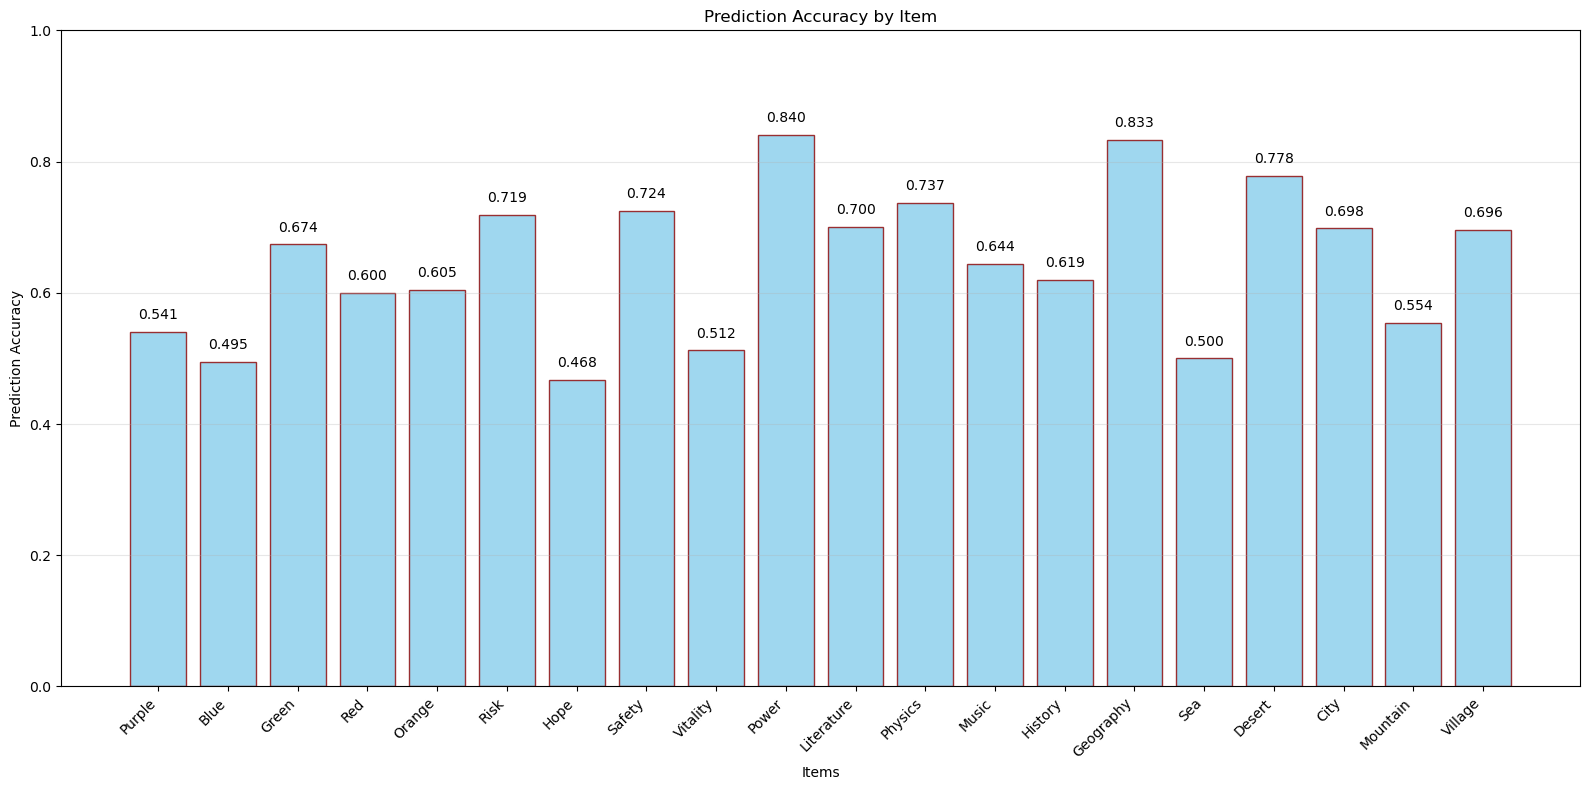

每个项目的预测准确率:
--------------------------------------------------
Purple      : 0.541
Blue        : 0.495
Green       : 0.674
Red         : 0.600
Orange      : 0.605
Risk        : 0.719
Hope        : 0.468
Safety      : 0.724
Vitality    : 0.512
Power       : 0.840
Literature  : 0.700
Physics     : 0.737
Music       : 0.644
History     : 0.619
Geography   : 0.833
Sea         : 0.500
Desert      : 0.778
City        : 0.698
Mountain    : 0.554
Village     : 0.696

每个项目的预测统计:
--------------------------------------------------
Purple      : 总选择次数= 37, 正确预测次数= 20, 准确率=0.541
Blue        : 总选择次数= 97, 正确预测次数= 48, 准确率=0.495
Green       : 总选择次数= 95, 正确预测次数= 64, 准确率=0.674
Red         : 总选择次数= 25, 正确预测次数= 15, 准确率=0.600
Orange      : 总选择次数= 81, 正确预测次数= 49, 准确率=0.605
Risk        : 总选择次数= 32, 正确预测次数= 23, 准确率=0.719
Hope        : 总选择次数= 62, 正确预测次数= 29, 准确率=0.468
Safety      : 总选择次数= 29, 正确预测次数= 21, 准确率=0.724
Vitality    : 总选择次数= 41, 正确预测次数= 21, 准确率=0.512
Power       : 总选择次数= 25, 正确预测次数= 21, 准确率=0.840
Lite

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def calculate_prediction_accuracy(df, params, item_list):
    """
    计算每个item的预测准确率
    """
    correct_predictions = {item: 0 for item in item_list}
    total_predictions = {item: 0 for item in item_list}
    
    # 遍历每个trial
    for idx, row in df.iterrows():
        # 使用make_Xy的逻辑创建rowX
        rowX = {}
        for item in item_list:
            payoff = row[f"Payoff_{item}"]
            # 只把本轮真正出现的item放进来
            if pd.isna(payoff) or payoff <= 0:
                continue
            rowX[item] = {
                "EV": row[f"EV_{item}"],
                "Var": row[f"Var_{item}"],
                "Pref": row[f"Pref_{item}"],
                "Regret": row["Regret"],
                "Dis": row["Disappointment"],
                "Unc": row["Uncertainty"]
            }
        
        # 如果当前trial没有任何item出现，跳过
        if len(rowX) == 0:
            continue
        
        # 获取实际选择的item
        actual_choice = str(row["Choice_itemName"]).strip().title()
        
        if actual_choice in item_list and actual_choice in rowX:
            # 使用模型进行预测
            pred_item, pred_probs = predict_choice(params, rowX)
            
            # 检查预测是否正确
            if pred_item == actual_choice:
                correct_predictions[actual_choice] += 1
            
            # 累计该item被选择的次数
            total_predictions[actual_choice] += 1
    
    # 计算每个item的预测准确率
    accuracy_dict = {}
    for item in item_list:
        total = total_predictions[item]
        if total > 0:
            accuracy = correct_predictions[item] / total
            accuracy_dict[item] = accuracy
        else:
            accuracy_dict[item] = 0.0
    
    return accuracy_dict, total_predictions

def plot_item_prediction_accuracy(accuracy_dict, item_list, title="Prediction Accuracy by Item"):
    """
    绘制每个item的预测准确率柱状图
    """
    accuracies = [accuracy_dict.get(item, 0.0) for item in item_list]
    
    plt.figure(figsize=(16, 8))
    bars = plt.bar(range(len(item_list)), accuracies, color='skyblue', alpha=0.8, edgecolor='darkred')
    
    plt.xlabel("Items")
    plt.ylabel("Prediction Accuracy")
    plt.title(title)
    plt.ylim(0, 1)
    plt.xticks(range(len(item_list)), item_list, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # 在每个柱子上显示准确率数值
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.015,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # 打印详细结果
    print("每个项目的预测准确率:")
    print("-" * 50)
    for item in item_list:
        accuracy = accuracy_dict.get(item, 0.0)
        print(f"{item:12}: {accuracy:.3f}")

# 使用方法
# 假设你有数据框df、模型参数params和item_list

# 计算预测准确率
accuracy_dict, total_predictions = calculate_prediction_accuracy(df_scaled, params, item_list)

# 绘制预测准确率的柱状图
plot_item_prediction_accuracy(accuracy_dict, item_list)

# 也可以打印每个item的预测统计信息
print("\n每个项目的预测统计:")
print("-" * 50)
for item in item_list:
    total = total_predictions[item]
    correct = accuracy_dict.get(item, 0.0) * total if total > 0 else 0
    print(f"{item:12}: 总选择次数={int(total):3d}, 正确预测次数={int(correct):3d}, 准确率={accuracy_dict.get(item, 0.0):.3f}")

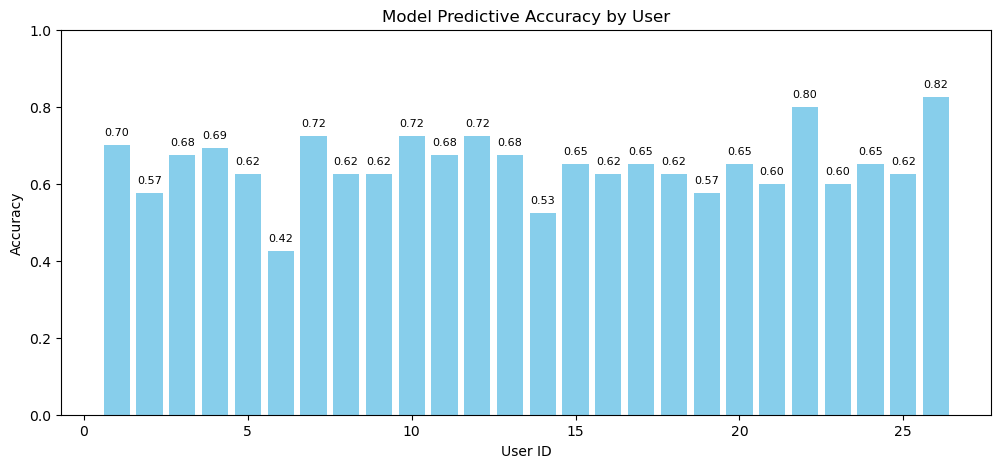

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 你已有的 metrics 字典
# metrics = {1:{'Accuracy':...}, 2:{'Accuracy':...}, ...}

users = list(metrics.keys())
accs = [metrics[u]['Accuracy'] for u in users]

plt.figure(figsize=(12,5))
bars = plt.bar(users, accs, color='skyblue')

plt.xlabel("User ID")
plt.ylabel("Accuracy")
plt.title("Model Predictive Accuracy by User")
plt.ylim(0,1)

# 在柱子顶部标数字
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, y+0.02, f"{y:.2f}", 
             ha='center', va='bottom', fontsize=8)

plt.show()
#64.81

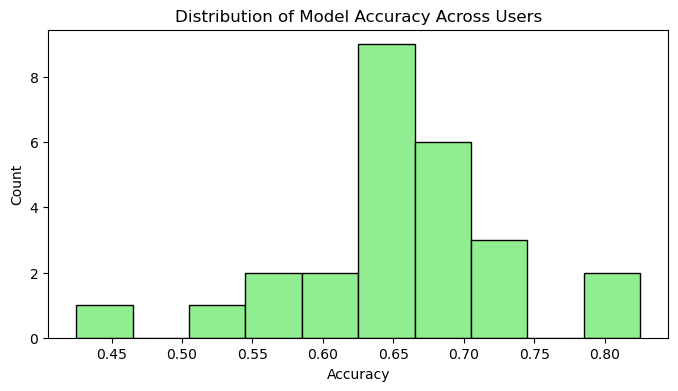

In [230]:
plt.figure(figsize=(8,4))
plt.hist(accs, bins=10, color='lightgreen', edgecolor='black')
plt.xlabel("Accuracy")
plt.ylabel("Count")
plt.title("Distribution of Model Accuracy Across Users")
plt.show()


In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

weights = pd.read_excel("user_weights_pro2.xlsx")
strategy_labels = ["w_ev", "w_p", "w_r", "w_reg", "w_dis", "w_u"]


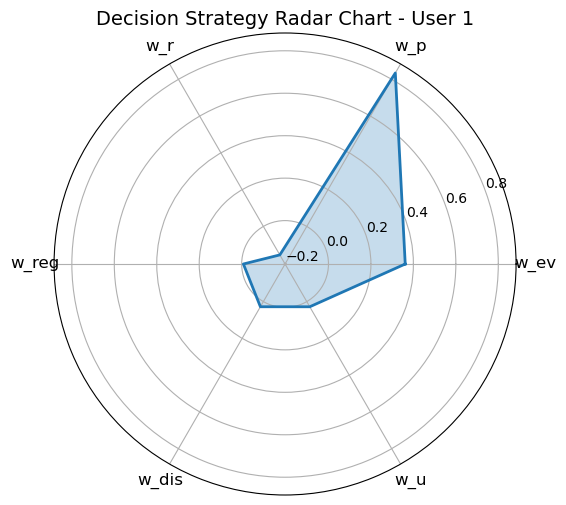

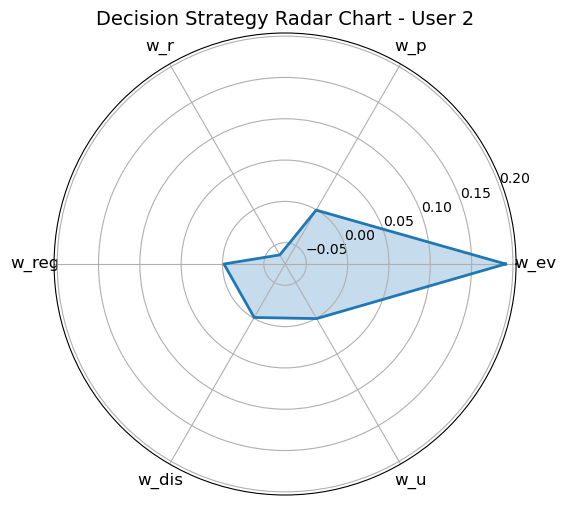

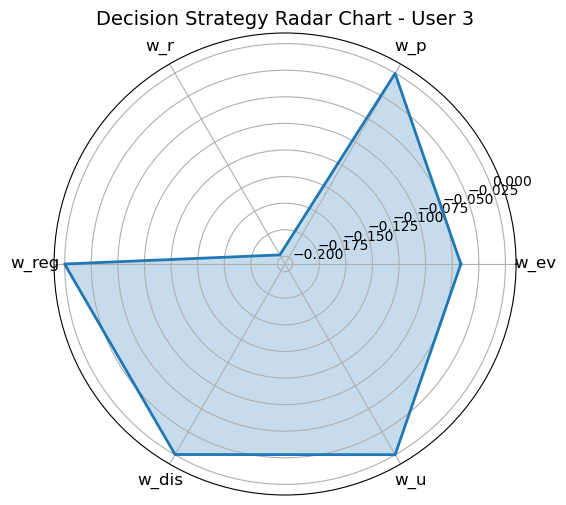

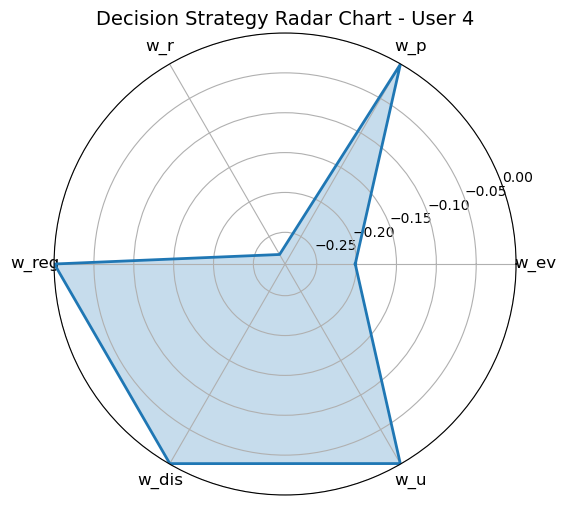

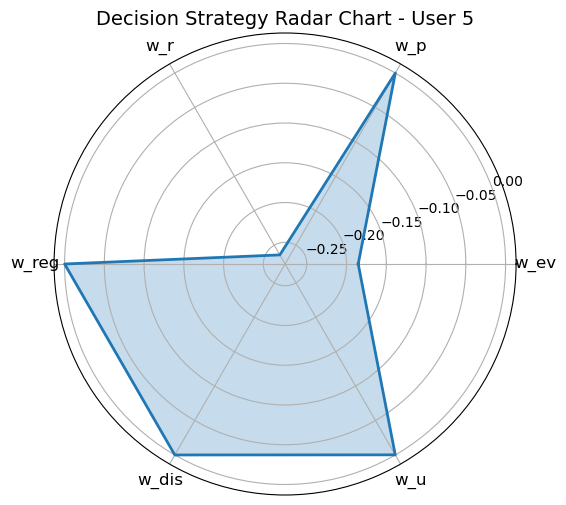

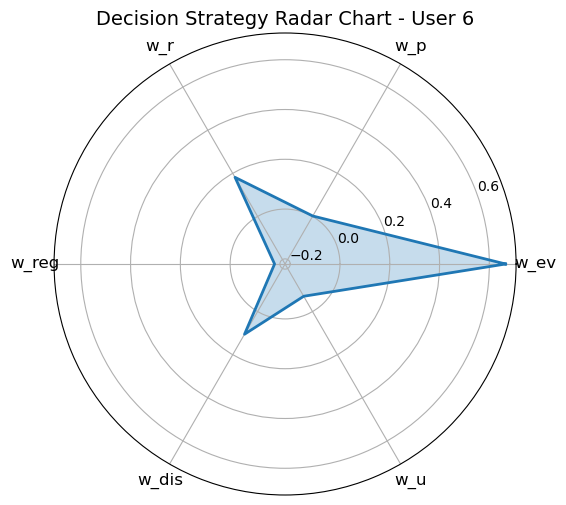

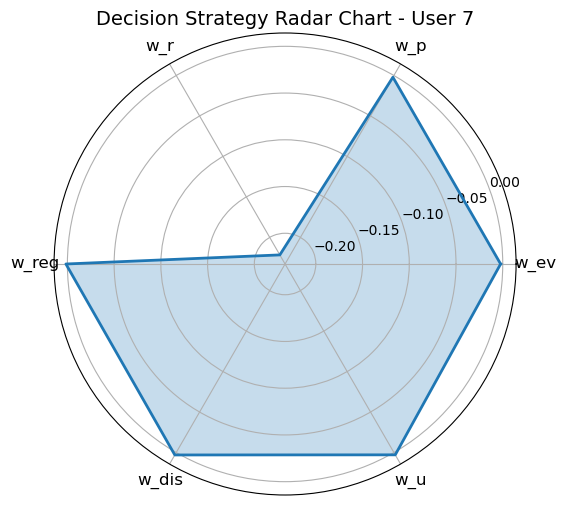

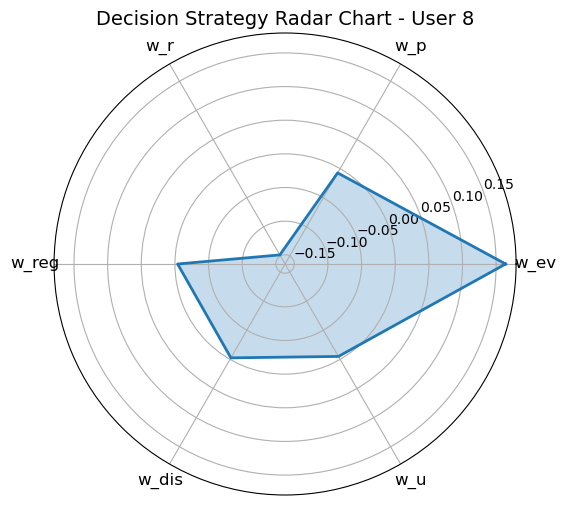

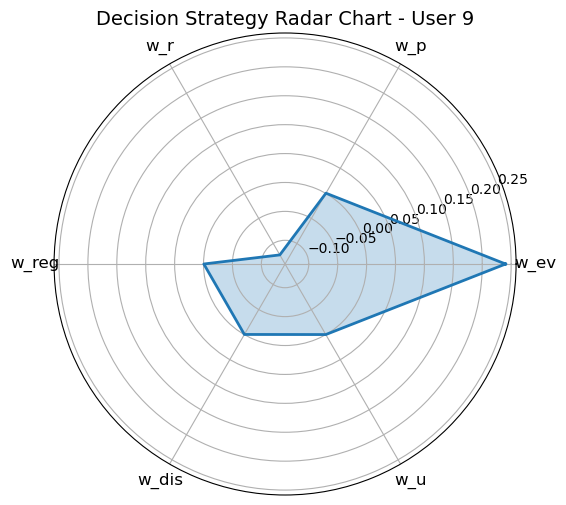

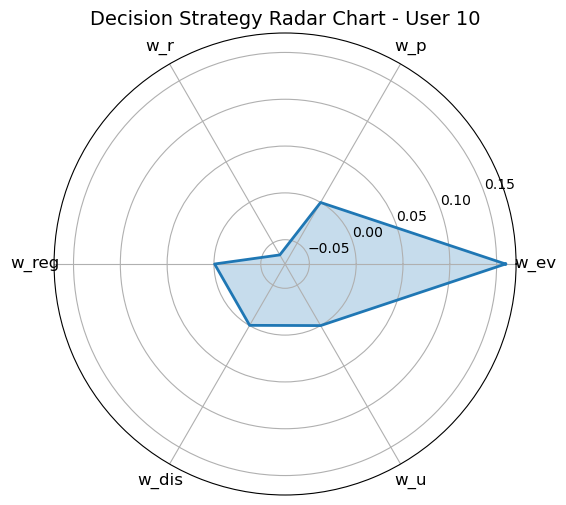

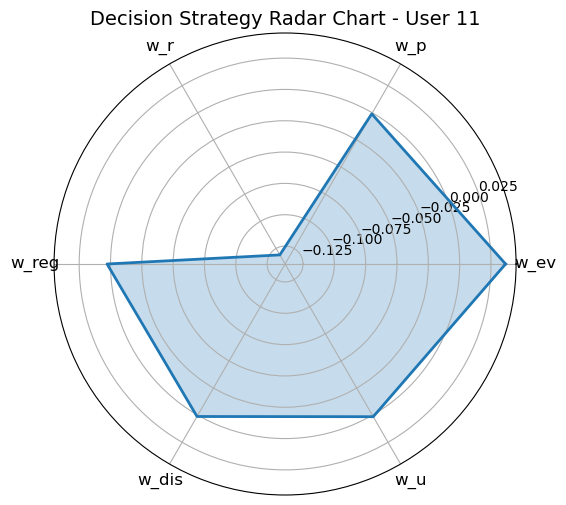

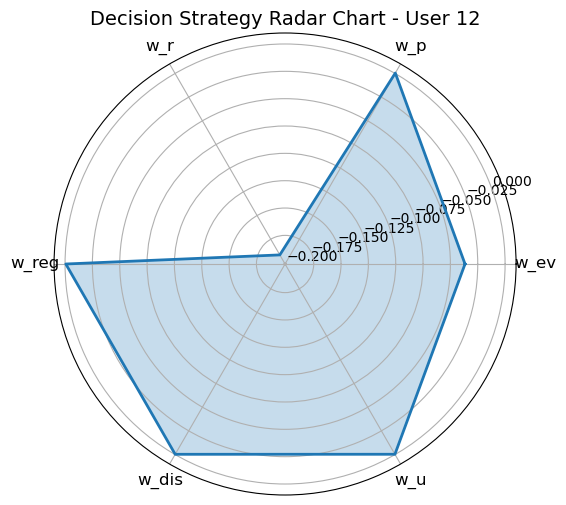

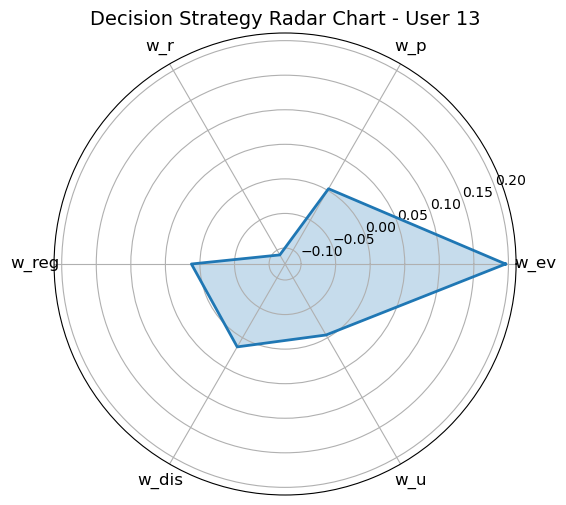

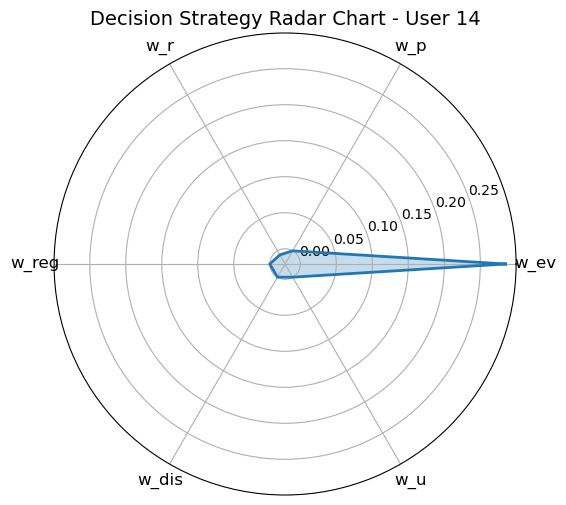

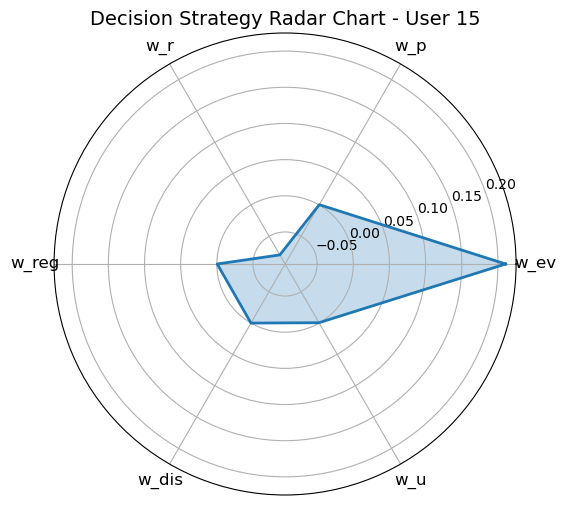

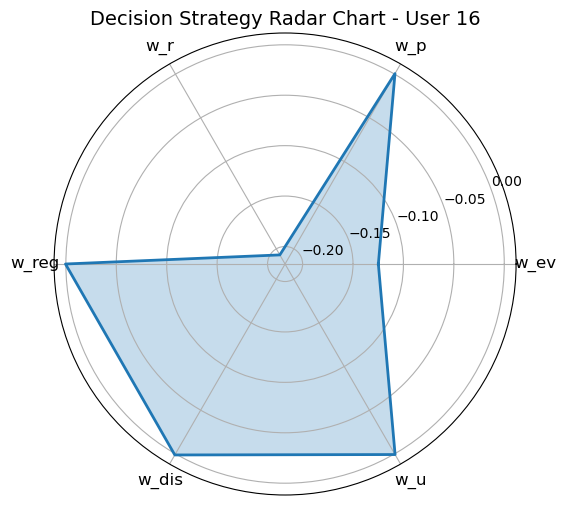

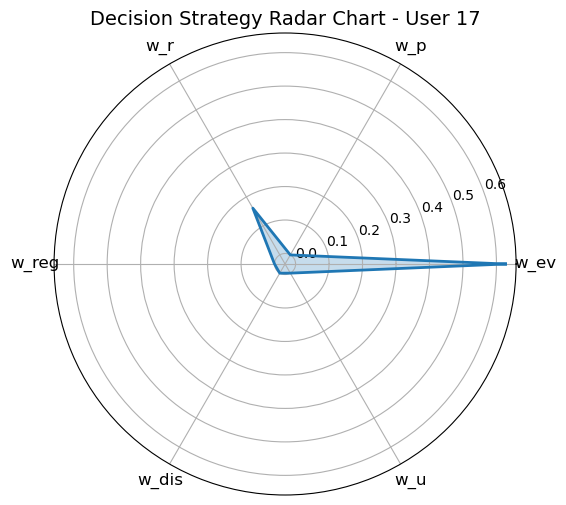

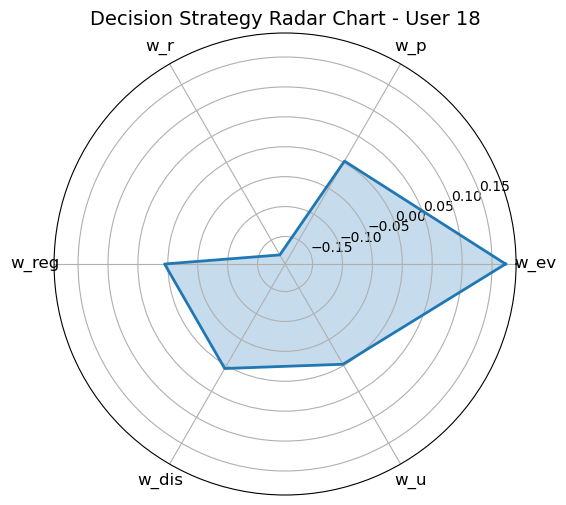

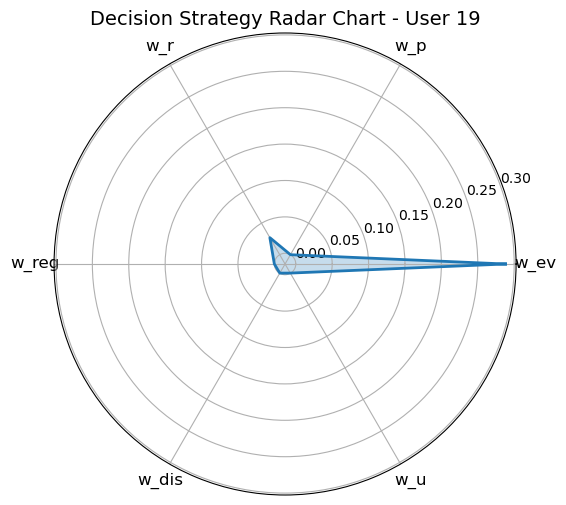

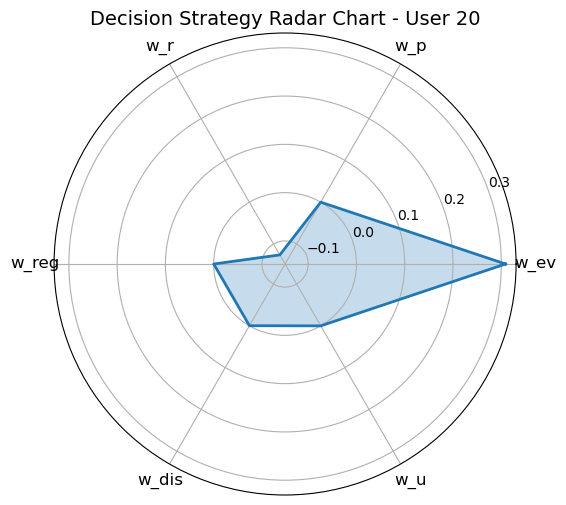

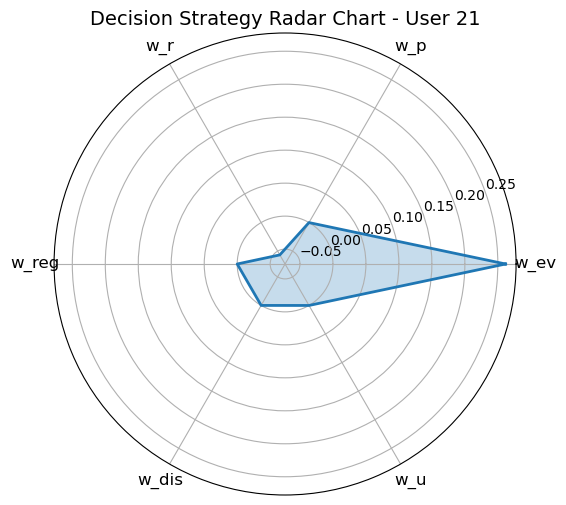

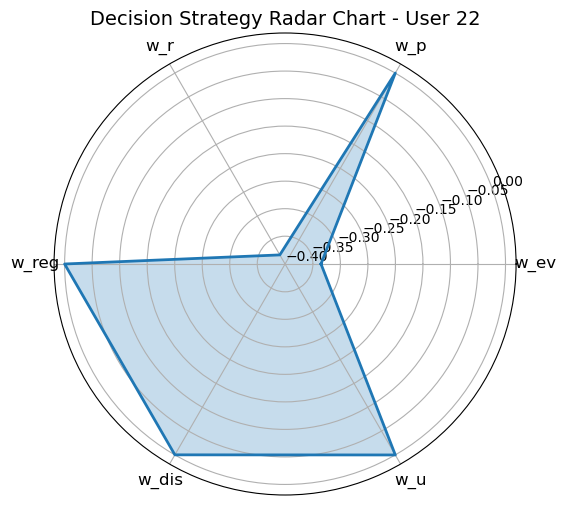

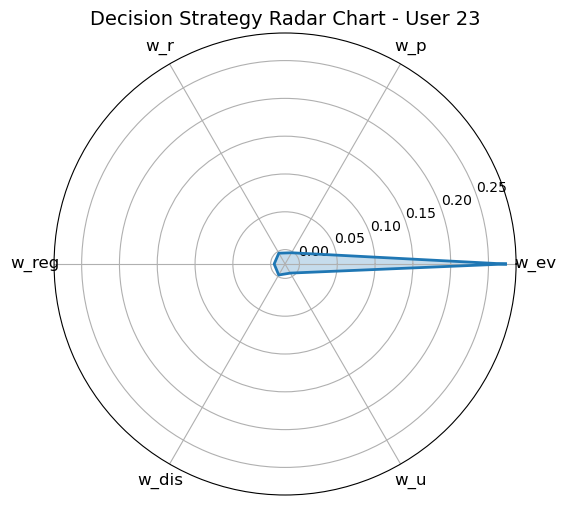

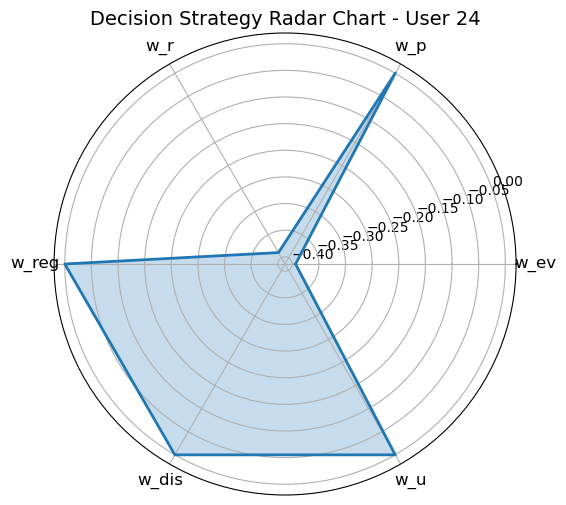

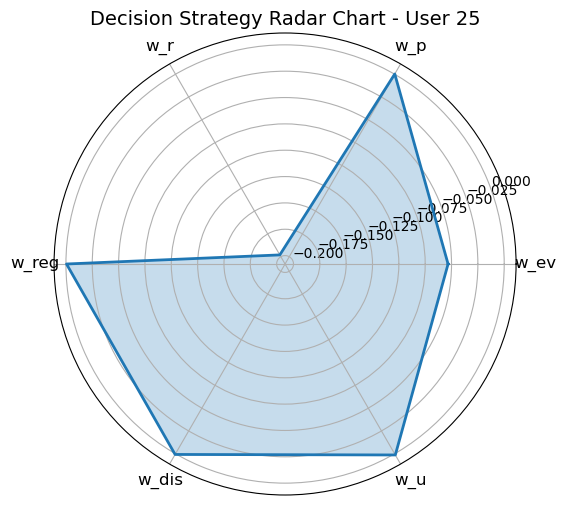

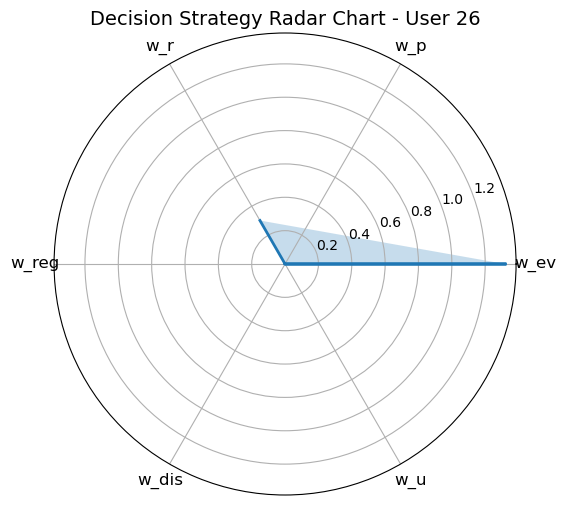

In [232]:
def plot_radar_for_user(user_id, row, save):
    values = row[strategy_labels].values.astype(float)
    
    # 闭合雷达图
    values = np.concatenate((values, [values[0]]))
    angles = np.linspace(0, 2*np.pi, len(values))

    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)

    ax.plot(angles, values, linewidth=2, label=f"User {user_id}")
    ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(strategy_labels, fontsize=12)

    ax.set_rlabel_position(20)
    plt.title(f"Decision Strategy Radar Chart - User {user_id}", fontsize=14)

    # 📌 如果 save=True，则保存图片
    if save:
        plt.savefig(f"user_{user_id}_radar.png", dpi=300, bbox_inches='tight')
    plt.show()

for _, row in weights.iterrows():
    user_id = int(row["User"])
    plot_radar_for_user(user_id, row, save=True)


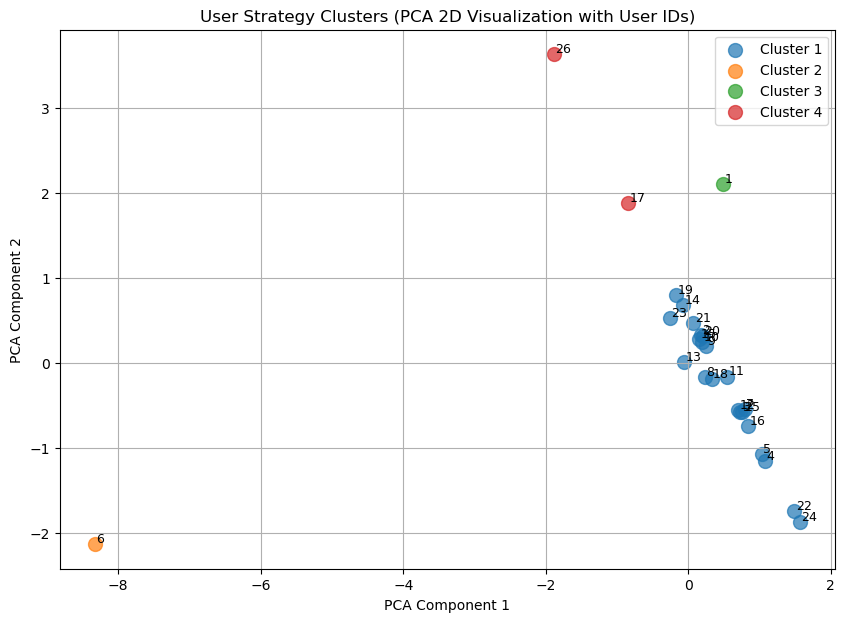

In [234]:
# 策略维度
strategy_labels = ["w_ev", "w_p", "w_r", "w_reg", "w_dis", "w_u"]

# 取 6 个策略参数
X = weights[strategy_labels].values

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 聚类（K = 3 或你想用的 K）
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
weights["Cluster"] = cluster_labels


# PCA 降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制聚类图
plt.figure(figsize=(10, 7))

colors = ["red", "blue", "green", "orange", "purple"]
for i in range(k):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f"Cluster {i+1}", alpha=0.7, s=100)

# ⭐ 在每个点上标注用户 ID
for idx, row in weights.iterrows():
    user_id = int(row["User"])
    x, y = X_pca[idx, 0], X_pca[idx, 1]
    plt.text(x + 0.02, y + 0.02, str(user_id), fontsize=9)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("User Strategy Clusters (PCA 2D Visualization with User IDs)")
plt.legend()
plt.grid(True)
plt.show()


In [235]:
cluster_summary = weights.groupby("Cluster")[strategy_labels].mean()
cluster_summary

,w_ev,w_p,w_r,w_reg,w_dis,w_u
Cluster,,,,,,
0,0.064193,-0.000261,-0.153925,0.000409,0.000871,-0.000551
1,0.665185,0.002006,0.181382,-0.178441,0.105129,-0.070946
2,0.361596,0.834286,-0.154979,-0.008129,0.028058,0.028196
3,0.973258,-0.000003,0.231187,0.000095,0.000174,0.000089


            Strategy      w_ev       w_p       w_r     w_reg     w_dis  \
0  Preference-driven  0.361596  0.834286 -0.154979 -0.008129  0.028058   
1       Value-driven  0.191088 -0.000486 -0.063052 -0.001796 -0.001023   
2        Risk-driven -0.041901 -0.000305 -0.197320  0.000125 -0.000341   
3        Risk-driven -0.201724 -0.000464 -0.275961 -0.000334 -0.000613   
4        Risk-driven -0.185328  0.000017 -0.264112 -0.000045  0.000015   
5       Value-driven  0.665185  0.002006  0.181382 -0.178441  0.105129   
6        Risk-driven -0.002281 -0.002131 -0.221647  0.001582  0.003022   
7       Value-driven  0.164020 -0.007336 -0.148071 -0.004001 -0.002619   
8       Value-driven  0.240354  0.000420 -0.122836 -0.000487 -0.000278   
9       Value-driven  0.159560 -0.000070 -0.064735 -0.000671 -0.000301   

        w_u  
0  0.028196  
1  0.000551  
2 -0.000182  
3 -0.000690  
4 -0.000139  
5 -0.070946  
6  0.002871  
7 -0.005045  
8 -0.000098  
9  0.000006  

策略分布统计：
Strategy
Value-driven 

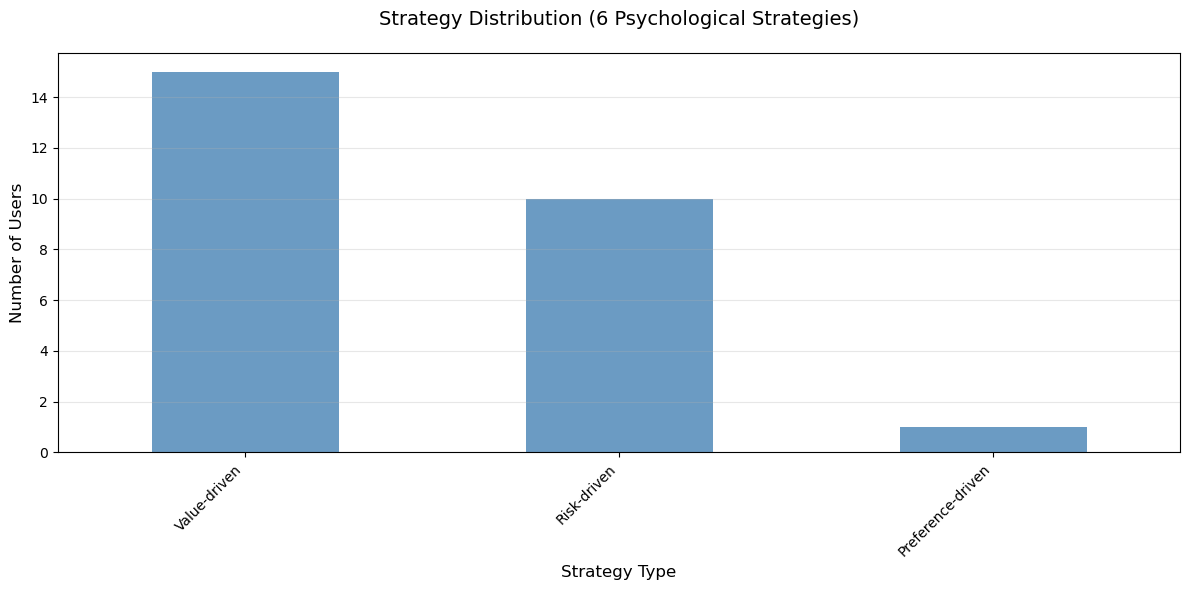

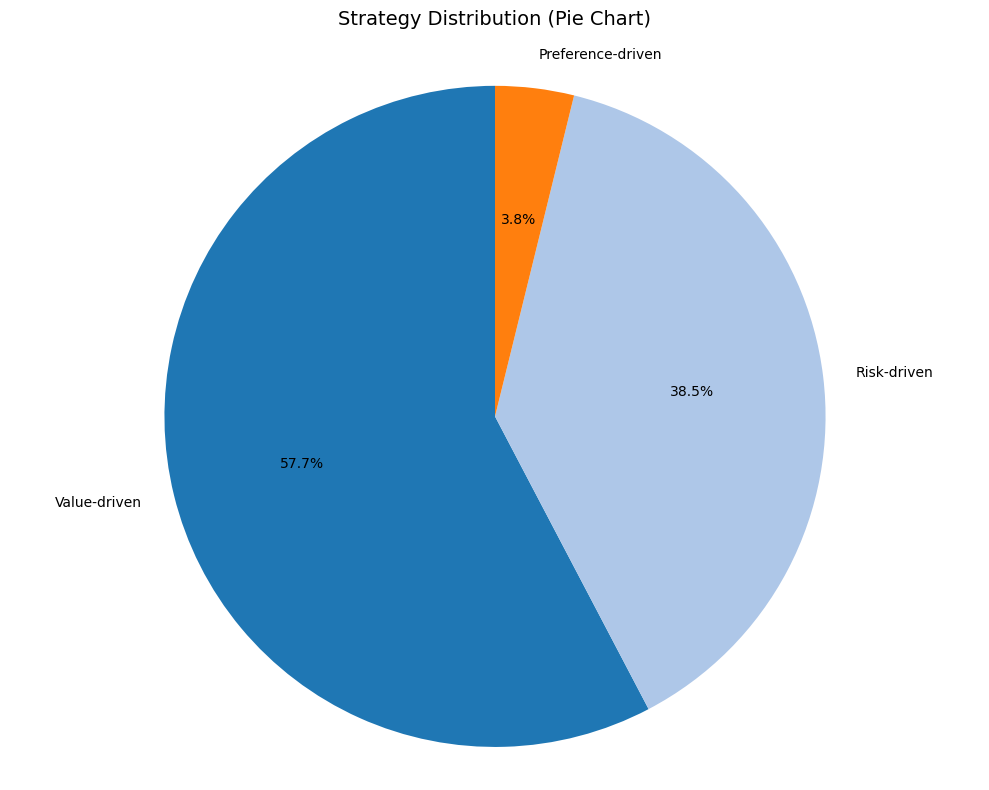

In [236]:
# 读取 Excel 数据（请根据实际文件路径修改）

weights = pd.read_excel("user_weights_pro2.xlsx")
# 只保留 6 个核心 weight
core_weights = ["w_ev", "w_p", "w_r", "w_reg", "w_dis", "w_u"]

# 策略映射
strategy_map = {
    "w_ev":  "Value-driven",
    "w_p":   "Preference-driven",
    "w_r":   "Risk-driven",
    "w_reg": "Regret-driven",
    "w_dis": "Disappointment-driven",
    "w_u":   "Uncertainty-driven",
}

# 找出每行的主导策略（绝对值最大的权重）
def find_strategy(row):
    w = row[core_weights]
    max_w = w.abs().idxmax()
    return strategy_map[max_w]

weights["Strategy"] = weights.apply(find_strategy, axis=1)

# 查看前几行
print(weights[["Strategy"] + core_weights].head(10))
print("\n策略分布统计：")

# 统计每种策略的数量
strategy_counts = weights["Strategy"].value_counts()
print(strategy_counts)

# 绘制柱状图
plt.figure(figsize=(12, 6))
strategy_counts.plot(kind="bar", color='steelblue', alpha=0.8)
plt.title("Strategy Distribution (6 Psychological Strategies)", fontsize=14, pad=20)
plt.xlabel("Strategy Type", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(f"factor1.png", dpi=300, bbox_inches='tight')
plt.show()

# 如果你想绘制饼图
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20(range(len(strategy_counts)))
plt.pie(strategy_counts, labels=strategy_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title("Strategy Distribution (Pie Chart)", fontsize=14, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.savefig(f"factor2.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
def make_Xy_small(user_df):
    X = []
    y = []
    for _, row in user_df.iterrows():
        rowX = {}
        for item in item_list:
            payoff = row[f"Payoff_{item}"]
            # 只把本轮真正出现的 item（payoff 非空且 >0）放进来
            if pd.isna(payoff) or payoff <= 0:
                continue
            rowX[item] = {
                "EV": row[f"EV_{item}"],
                "Var": row[f"Var_{item}"],
                "Pref": row[f"Pref_{item}"],
            }
        if len(rowX) == 0:
            continue
        X.append(rowX)
        y.append(row["Choice_itemName"])
    return X, y

In [8]:
#build a small model only with ev,p,r

def neg_loglik_small(params, X, y, reg_strength=0.01):
    w_ev, w_p, w_r, b, beta = params
    ll = 0.0
    
    for t, rowX in enumerate(X):
        items = list(rowX.keys())          # 本轮出现的选项
        Qs = []
        for item in items:
            d = rowX[item]
            Q = (
                w_ev * d["EV"] +
                w_p * d["Pref"] -
                w_r * d["Var"] +
                b
            )
            Qs.append(Q)
        Qs = np.array(Qs, dtype=float)
        
        # 🔧 关键修复:数值稳定的softmax
        scaled_Qs = beta * Qs
        max_Q = np.max(scaled_Qs)  # 减去最大值防止exp溢出
        exp_Qs = np.exp(scaled_Qs - max_Q)
        P = exp_Qs / np.sum(exp_Qs)
        
        # 🔧 添加数值检查
        if np.any(np.isnan(P)) or np.any(np.isinf(P)):
            return 1e10  # 如果出现数值问题,返回大惩罚
        
        chosen = y[t]
        if chosen not in items:
            continue
        chosen_idx = items.index(chosen)
        
        # 🔧 更强的数值保护
        ll += np.log(np.clip(P[chosen_idx], 1e-15, 1.0))
    
    # 添加 L2 正则化项
    reg_term = reg_strength * np.sum(np.square(params[:7]))  # 不包含 beta
    ll -= reg_term  # 减去正则化项
    
    return -ll

In [9]:
def predict_choice_small(params, rowX):
    w_ev, w_p, w_r, b, beta = params
    items = list(rowX.keys())
    Qs = []

    for item in items:
        d = rowX[item]
        Q = (
            w_ev * d["EV"] +
            w_p * d["Pref"] -
            w_r * d["Var"]  +
            b
        )
        Qs.append(Q)

    Qs = np.array(Qs, dtype=float)
    P = softmax(beta * Qs)
    pred_item = items[np.argmax(P)]
    return pred_item, P

In [13]:
results_min = {}
metrics_min = {}
np.random.seed(42)

# 使用标准化后的数据进行优化
df_scaled = standardize_features(df)

for uid in df_scaled["User"].unique():
    user_df = df_scaled[df_scaled["User"] == uid]
    X, y = make_Xy_small(user_df)

    if len(X) == 0:
        print(f"[Warning] User {uid} 没有有效 trial，跳过")
        continue

    # 初始化权重更合理（较小的随机值）
    init = np.random.uniform(-0.1, 0.1, size=5)

    # # 添加优化器的边界（bounds），防止参数过大
    bounds = [(-10, 10)] * 4 + [(0.1, 10)]   # beta > 0

    # 使用 L-BFGS-B 优化器，它支持边界限制
    # 使用 TNC 优化器替代 L-BFGS-B
    # 使用 `trust-constr` 优化器进行优化
    # res = minimize(neg_loglik, init, args=(X, y), method="trust-constr", bounds=bounds)
    res = minimize(neg_loglik_small, init, args=(X, y), method="L-BFGS-B", bounds=bounds)


    params = res.x
    results_min[uid] = params

    # 评估：accuracy 和 loglik
    correct = 0
    total_ll = 0.0
    n = 0

    for t, rowX in enumerate(X):
        items = list(rowX.keys())
        pred_item, P = predict_choice_small(params, rowX)
        chosen = y[t]

        if chosen not in items:
            continue

        n += 1
        if pred_item == chosen:
            correct += 1

        chosen_idx = items.index(chosen)
        total_ll += np.log(P[chosen_idx] + 1e-12)

    if n == 0:
        acc = np.nan
        aic = bic = np.nan
    else:
        acc = correct / n
        k = 8
        aic = -2 * total_ll + 2 * k
        bic = -2 * total_ll + k * np.log(n)

    metrics_min[uid] = dict(Accuracy=acc,
                        LogLikelihood=total_ll,
                        AIC=aic,
                        BIC=bic)

print("结果参数：", results_min)
print("评估指标：", metrics_min)


✓ 中心化列: 40 个
✓ 保留原值的Pref列: 20 个
结果参数： {1: array([ 1.7738468 ,  0.4181239 , -0.79672038,  0.00328378,  1.98847212]), 2: array([ 1.32708517e+00,  7.12830167e-05, -4.63859161e-01,  8.80990033e-06,
        1.40593101e+00]), 3: array([-2.63901465e-01,  4.20194817e-04, -1.38238033e+00, -3.04911550e-04,
        1.40794050e+00]), 4: array([-1.05648501, -0.00606087, -1.48376773, -0.00211012,  1.82192981]), 5: array([-1.00845930e+00,  1.92831902e-05, -1.46550078e+00,  8.36255270e-06,
        1.77892284e+00]), 6: array([ 2.47654326, -0.03882304,  0.65935876,  0.01194893,  2.56341035]), 7: array([ 7.86076019e-03,  1.86916112e-06, -1.46164935e+00, -1.35860376e-05,
        1.46163123e+00]), 8: array([ 1.06683151e+00, -1.03733696e-03, -9.88873058e-01,  9.30443666e-04,
        1.45982102e+00]), 9: array([ 1.43270535e+00, -3.72226624e-05, -7.74436626e-01, -1.06447119e-04,
        1.62858989e+00]), 10: array([ 1.20056357e+00, -1.07293268e-03, -5.06946999e-01,  2.73659487e-04,
        1.30368986e+00]), 1

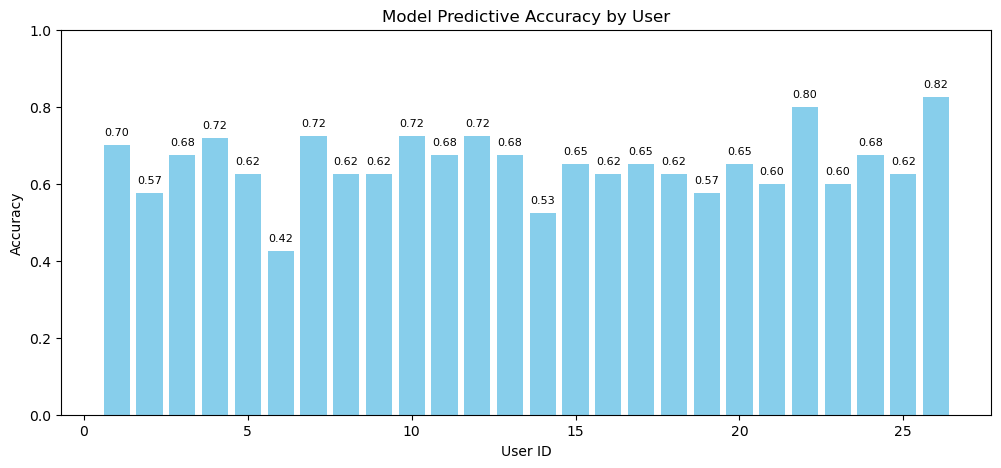

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 你已有的 metrics 字典
# metrics = {1:{'Accuracy':...}, 2:{'Accuracy':...}, ...}

users = list(metrics_min.keys())
accs = [metrics_min[u]['Accuracy'] for u in users]

plt.figure(figsize=(12,5))
bars = plt.bar(users, accs, color='skyblue')

plt.xlabel("User ID")
plt.ylabel("Accuracy")
plt.title("Model Predictive Accuracy by User")
plt.ylim(0,1)

# 在柱子顶部标数字
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, y+0.02, f"{y:.2f}", 
             ha='center', va='bottom', fontsize=8)

plt.show()
#64.92

In [210]:
param_names = ["w_ev","w_p","w_r","b","beta"]
rows = []
for uid, pars in results_min.items():
    row = {"User": uid}
    for name, val in zip(param_names, pars):
        row[name] = val
    rows.append(row)

params_df = pd.DataFrame(rows)
params_df.to_excel("user_weights_min.xlsx", index=False)


            Strategy      w_ev       w_p       w_r
0  Preference-driven  1.175018  2.721492 -0.522844
1       Value-driven  1.327216 -0.000012 -0.463945
2        Risk-driven -0.263965  0.000095 -1.382643
3        Risk-driven -1.056500 -0.008003 -1.483814
4        Risk-driven -1.008426  0.000170 -1.465447
5       Value-driven  2.476538 -0.038852  0.659356
6        Risk-driven  0.007865  0.000015 -1.461659
7       Value-driven  1.066846 -0.000973 -0.988878
8       Value-driven  1.432738  0.000003 -0.774442
9       Value-driven  1.200696 -0.004093 -0.506976

策略分布统计：
Strategy
Value-driven         14
Risk-driven          11
Preference-driven     1
Name: count, dtype: int64


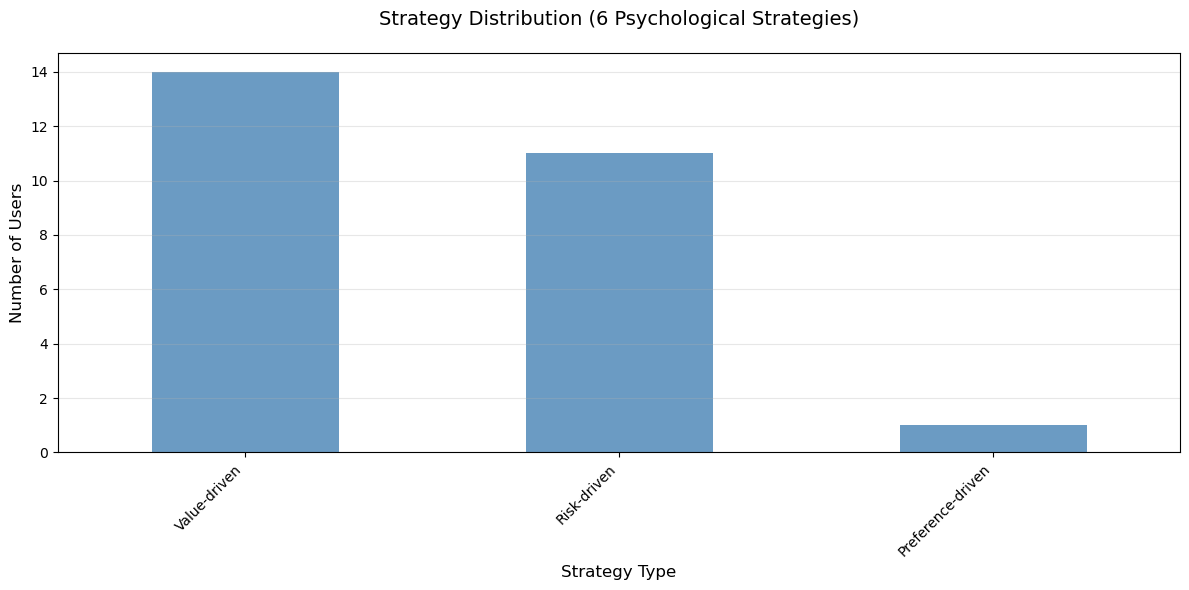

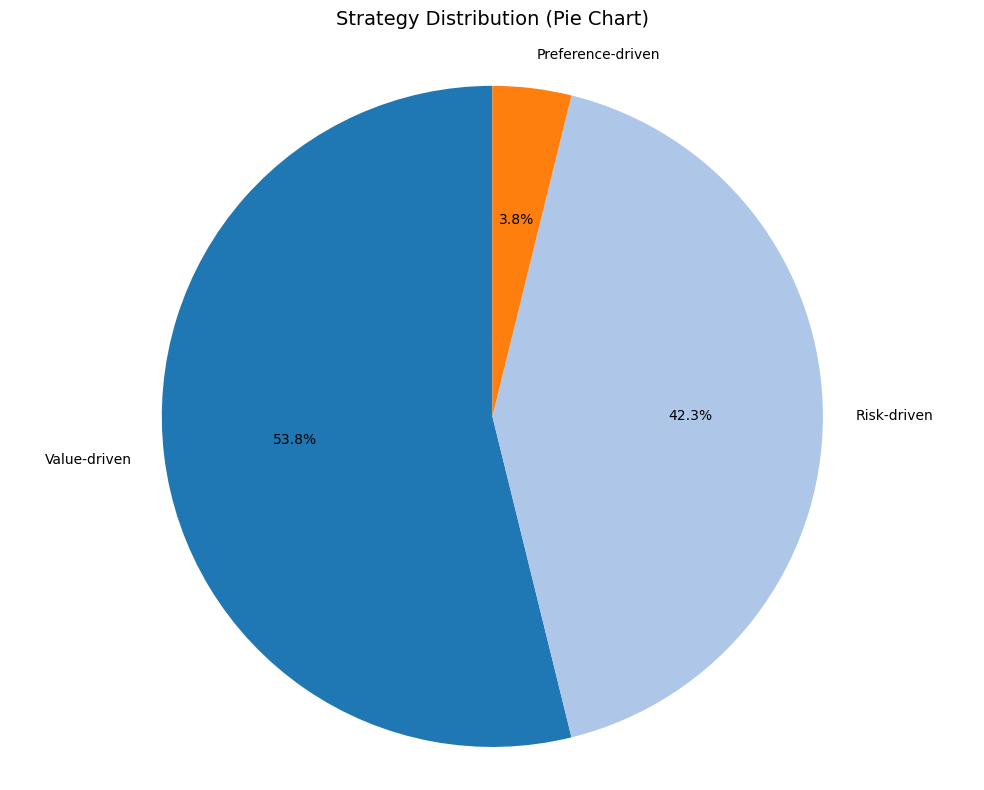

In [237]:
# 读取 Excel 数据（请根据实际文件路径修改）

weights = pd.read_excel("user_weights_min.xlsx")
# 只保留 6 个核心 weight
core_weights = ["w_ev", "w_p", "w_r"]

# 策略映射
strategy_map = {
    "w_ev":  "Value-driven",
    "w_p":   "Preference-driven",
    "w_r":   "Risk-driven",
}

# 找出每行的主导策略（绝对值最大的权重）
def find_strategy(row):
    w = row[core_weights]
    max_w = w.abs().idxmax()
    return strategy_map[max_w]

weights["Strategy"] = weights.apply(find_strategy, axis=1)

# 查看前几行
print(weights[["Strategy"] + core_weights].head(10))
print("\n策略分布统计：")

# 统计每种策略的数量
strategy_counts = weights["Strategy"].value_counts()
print(strategy_counts)

# 绘制柱状图
plt.figure(figsize=(12, 6))
strategy_counts.plot(kind="bar", color='steelblue', alpha=0.8)
plt.title("Strategy Distribution (6 Psychological Strategies)", fontsize=14, pad=20)
plt.xlabel("Strategy Type", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 如果你想绘制饼图
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20(range(len(strategy_counts)))
plt.pie(strategy_counts, labels=strategy_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title("Strategy Distribution (Pie Chart)", fontsize=14, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

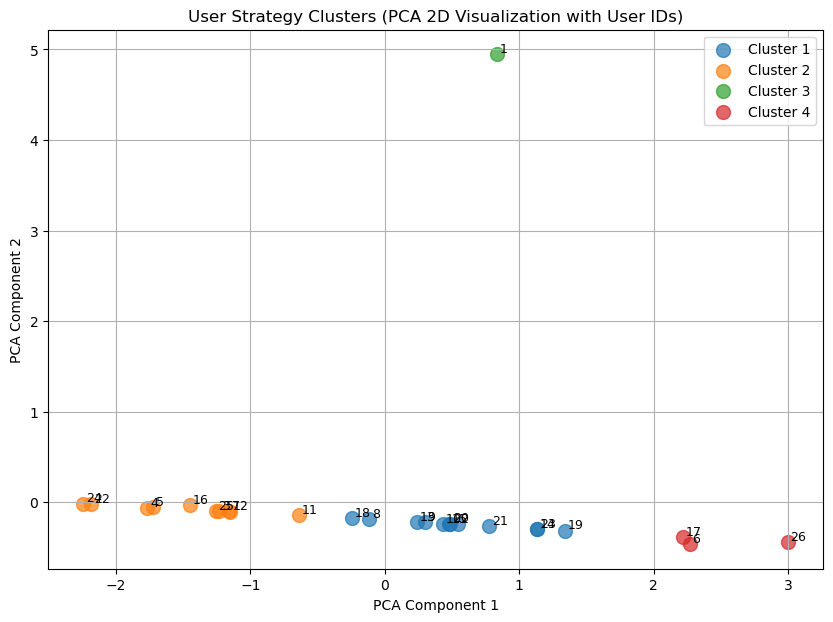

In [240]:
# 策略维度
strategy_labels = ["w_ev", "w_p", "w_r"]

# 取 6 个策略参数
X = weights[strategy_labels].values

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 聚类（K = 3 或你想用的 K）
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
weights["Cluster"] = cluster_labels


# PCA 降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 绘制聚类图
plt.figure(figsize=(10, 7))

colors = ["red", "blue", "green", "orange", "purple"]
for i in range(k):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f"Cluster {i+1}", alpha=0.7, s=100)

# ⭐ 在每个点上标注用户 ID
for idx, row in weights.iterrows():
    user_id = int(row["User"])
    x, y = X_pca[idx, 0], X_pca[idx, 1]
    plt.text(x + 0.02, y + 0.02, str(user_id), fontsize=9)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("User Strategy Clusters (PCA 2D Visualization with User IDs)")
plt.legend()
plt.grid(True)
plt.show()


In [241]:
cluster_summary = weights.groupby("Cluster")[strategy_labels].mean()
cluster_summary

,w_ev,w_p,w_r
Cluster,,,
0,1.411735,-0.000460,-0.513616
1,-0.641032,0.001787,-1.425155
2,1.175018,2.721492,-0.522844
3,2.822801,-0.011017,0.691767
